# CNN Image Data Preview & Statistics

### Welcome! 

This notebook allows you to preview some of your single-cell image patches to make sure your annotated data are of good quality. You will also get a chance to calculate the statistics for your annotated data which can be useful for data preprocessing, e.g. *class imbalance check* prior to CNN training.


In [1]:
import os
import json
import random
import zipfile

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from datetime import datetime
from skimage.io import imread

### Specify how many patches you'd like to visualise from your batch:

By default, the code below will allow you to see any 10 random patches per each class. If there is not enough training data for any label, a noisy image will be visualised. The default setting doesn't save the collage out, but you can change it by specifying the ```save_collage``` to ```True```.


In [2]:
LABELS = ["Interphase", "Prometaphase", "Metaphase", "Anaphase", "Apoptosis"]
patches_to_show = 10
save_collage = False


### Load a random 'annotation' zip file to check image patches:

In [3]:
zipfiles = [f for f in os.listdir("./") if f.startswith("annotation") and f.endswith(".zip")]
zip_file_name = zipfiles[0]


### Optional: specify which zip file you'd like to visualise:

In [4]:
zip_file_name = "annotation_02-08-2021--10-33-59.zip"


### Process the zip file & extract subfolders with individual images:

In [5]:
# Make sure zip file name is stripped of '.zip' suffix:

if zip_file_name.endswith(".zip"):
    zip_file_name = zip_file_name.split(".zip")[0]


# Check if the zipfile was extracted:

if not zip_file_name in os.listdir("./"):
    print (f"Zip file {zip_file_name}.zip : Exporting...", end="\t")
    
    with zipfile.ZipFile(f"./{zip_file_name}.zip", 'r') as zip_ref:
        zip_ref.extractall(f"./{zip_file_name}/")

else:
    print (f"Zip file {zip_file_name}.zip : Exported!...", end="\t")

print ("Done!")


Zip file annotation_02-08-2021--10-33-59.zip : Exporting...	Done!


### Plot the collage with all 5 labels:  

Label: Interphase contains 6 single-cell image patches
Label: Prometaphase contains 6 single-cell image patches
Label: Metaphase contains 5 single-cell image patches
Label: Anaphase contains 8 single-cell image patches
Label: Apoptosis contains 6 single-cell image patches


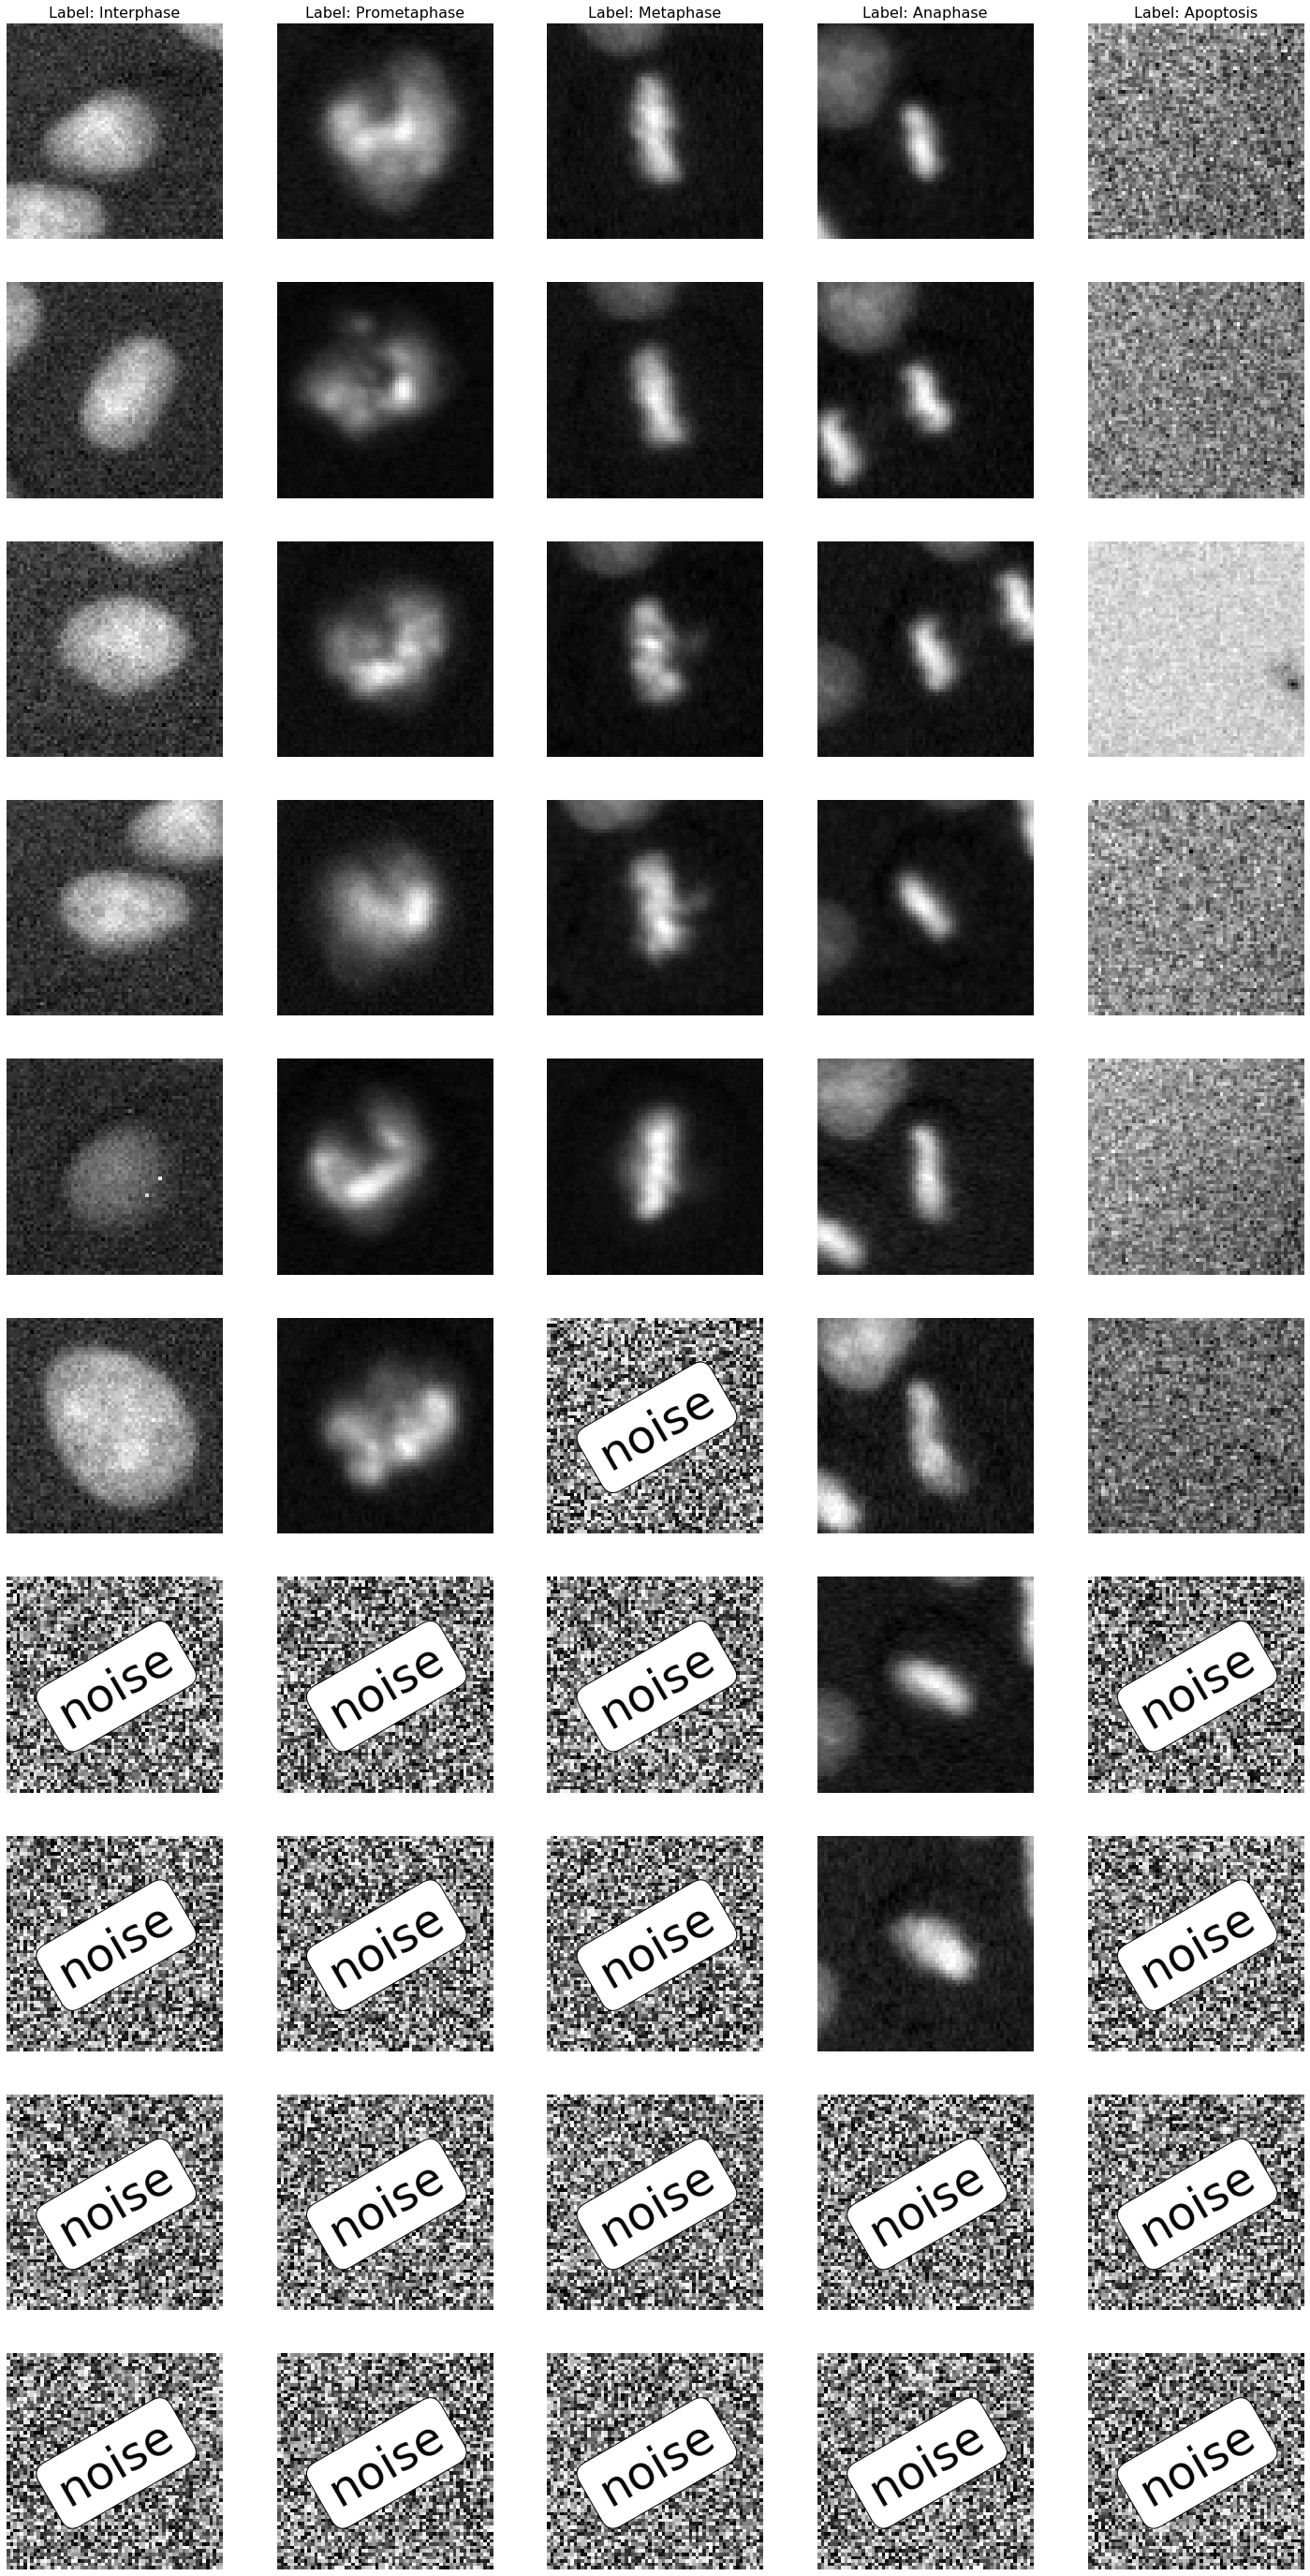

In [6]:
fig, axs = plt.subplots(figsize=(int(len(LABELS)*5), int(patches_to_show*5)), 
                        nrows=patches_to_show, ncols=len(LABELS), 
                        sharex=True, sharey=True)

for idx in range(len(LABELS)):
    
    label = LABELS[idx]
    label_dr = f"./{zip_file_name}/{label}/"
    
    # Check if directory exists:
    if os.path.isdir(label_dr):
        patch_list = os.listdir(label_dr)
        random.shuffle(patch_list)
        print (f"Label: {label} contains {len(patch_list)} single-cell image patches")
    
    else:
        patch_list = []
        print (f"Label: {label} has not been annotated.")
    
    # Plot the patches:
    for i in range(patches_to_show):
        
        # Set titles to individual columns
        if i == 0:
            axs[i][idx].set_title(f"Label: {label}", fontsize=16)
        
        if i >= len(patch_list):
            patch = np.random.randint(0,255,size=(64,64)).astype(np.uint8)
            axs[i][idx].text(x=32, y=32, s="noise", size=50, rotation=30., ha="center", va="center",
                             bbox=dict(boxstyle="round", ec=(0.0, 0.0, 0.0), fc=(1.0, 1.0, 1.0)))
        else:
            patch = plt.imread(label_dr + patch_list[i])
            
        axs[i][idx].imshow(patch, cmap="binary_r")
        axs[i][idx].axis('off')


if save_collage is True:
    plt.savefig("../label_image_patches.png", bbox_to_inches='tight')

plt.show()
plt.close()


## Calculate some data statistics WITHOUT unzipping the files:

In [7]:
label_count = dict({'Prometaphase' : 0, 'Metaphase' : 0, 'Interphase' : 0, 'Anaphase' : 0, 'Apoptosis' : 0})

for f in tqdm(zipfiles):
    
    archive = zipfile.ZipFile(f, 'r')
    json_data = archive.read(f.split(".zip")[0] + ".json")
    data = json.loads(json_data)
    
    # Count instances per label:
    counts = [[x, data['labels'].count(x)] for x in set(data['labels'])]
    print (f"File: {f}\n\t{counts}")
    
    # Add counts to label counter:
    for lab in counts:
        label_count[lab[0]] += lab[1]
    

100%|██████████| 1/1 [00:00<00:00, 200.17it/s]

File: annotation_02-08-2021--10-33-59.zip
	[['Prometaphase', 6], ['Anaphase', 8], ['Apoptosis', 6], ['Metaphase', 5], ['Interphase', 6]]


### Plot the statistics:

In [8]:
COLOR_CYCLE = [
    '#1f77b4', # blue
    '#ff7f0e', # orange
    '#2ca02c', # green
    '#d62728', # red
    '#9467bd', # purple
]

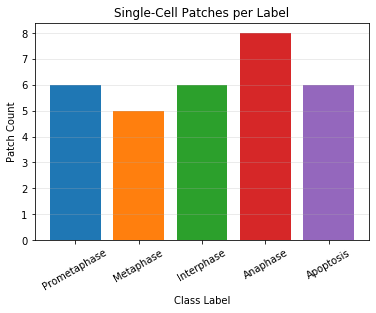

In [9]:
# Plot the bar graph:

plt.bar(range(len(label_count)), list(label_count.values()), align='center', color=COLOR_CYCLE)
plt.xticks(range(len(label_count)), list(label_count.keys()), rotation=30)
plt.title("Single-Cell Patches per Label")
plt.xlabel("Class Label")
plt.ylabel("Patch Count")
plt.grid(axis='y', alpha=0.3)
plt.show()
plt.close()


### Done!